<a href="https://colab.research.google.com/github/MatornenSinera/BDA-2ndSemester/blob/master/Copy_of_Boston_HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install neupy

In [0]:

# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn import datasets

dataset = datasets.load_boston()
data, target = dataset.data, dataset.target
print(dataset.DESCR)



Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
        
        


Let's print some rows, to visualize this dataset:

In [20]:
def BostonHousingRealEstateReport(display):
  df = pd.DataFrame(data=display['data'], columns=display['feature_names'])
  df['MEDV'] = display['target']
  y = df['MEDV'].copy()
  del df['MEDV']
  df = pd.concat((y, df), axis=1)
  return df
  
BostonHousingRealEstateReport(dataset).head()


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#**PREPROCESSING**

There are 13 continuous attributes (including “class” attribute “MEDV”) and 1 binary-valued attribute. There are no columns that have multiple categories, which simplifies initial data processing..

From the table above you can notice that every column has values in different scales. It might slow down or completely break networks convergence. In order to fix this issue, we should normalize values in every column. One of the simplest way to do it is to map every value into range between 0 and 1, where maximum value in every column will be equal to 1 and the smallest one - to 0.

In [21]:
from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

data = data_scaler.fit_transform(data)
target = target_scaler.fit_transform(target.reshape(-1, 1))

dataset.data=data
dataset.target=target

BostonHousingRealEstateReport(dataset).head()


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.422222,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.368889,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.660000,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.631111,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.693333,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338



#Implementation: Shuffle and Split Data

Next step that implementation requires is splitting the Boston housing dataset into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset. We are going to divide data in a 85-15 split.

Data is split into X_Train set and X_Test set.

Target is split into Y_Train set and Y_Test set.





In [0]:
from sklearn.model_selection import train_test_split
from neupy import utils

utils.reproducible()

x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15
)

Then, we should implement a neural network, which will be our model for the case. Things to specify in this example:

\# of inputs: 
13 - one starting node for each feature.

\# of outputs: 1 - one node with numerical value that predicts price of the house.

In [23]:
from neupy.layers import *


n_inputs = 13

n_outputs = 1

network = join(
    # This layer doesn't do any computation. It just
    # defines how many inputs network should expect.
    Input(n_inputs),

    # Hidden layer. Number of neurons can be adjusted
    # in order to improve performance or deal with overfitting
    Sigmoid(50),
    

    # Sigmoid outputs values between 0 and 1 and all
    # the prices that we want to predict has been rescaled
    # to the same range.
    Sigmoid(n_outputs),
)

print(network)

(?, 13) -> [... 3 layers ...] -> (?, 1)


Other possible ways to implement activation functions inside the framework:

Linear() - Linear Unit.

ReLU() - Rectified Linear Unit.

ELU() - Exponentian Linear Unit.

Tanh() - Hyperbolic tangent.

Softmax() - Normalized exponential function.

In [24]:
from neupy import algorithms

optimizer = algorithms.LevenbergMarquardt(
    # First argument has to be neural network
    network,

    # With this option enabled network shows its configuration
    # before the training and its progress during the training
    verbose=True,

    # In order to avoid showing information about
    # network training progress after every epoch we can
    # do it less frequently, for example, every 5th epoch.
    show_epoch=5,
)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 5
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/sigmoid-8:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.30 seconds


And finally, with combined power of data, structure and algorithm, the process of training the neural network can begin. 

To see the progress of our creations, we can try to plot errors, that will appear during the validation of our model, based on the Mean Square Error.

#1 : [277 ms] train: 0.050312, valid: 0.017184


#5 : [98 ms] train: 0.009471, valid: 0.013863


#10 : [93 ms] train: 0.008211, valid: 0.010150


#15 : [96 ms] train: 0.004627, valid: 0.009570


#20 : [108 ms] train: 0.003933, valid: 0.008911


#25 : [94 ms] train: 0.003370, valid: 0.009719


#30 : [99 ms] train: 0.002499, valid: 0.009321


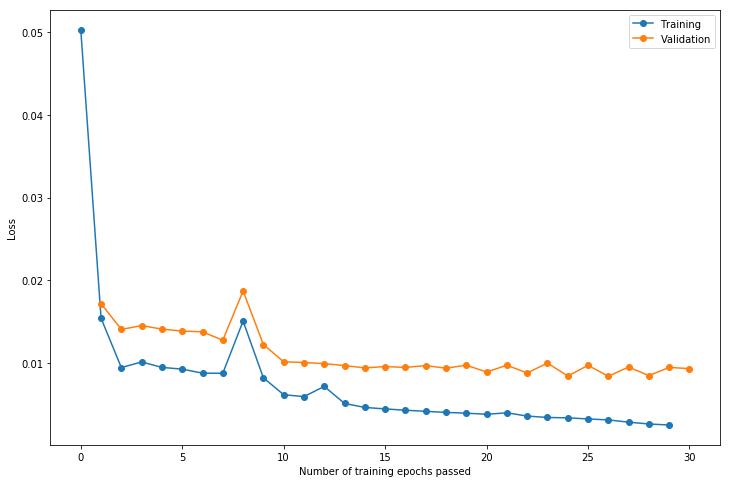

In [25]:
optimizer.train(x_train, y_train, x_test, y_test, epochs=30)
optimizer.plot_errors()

And now, just to test the network.

To use already trained neural network, we need to implement our basic example, transformed and preprocessed by the same process, which changed values of our training data.

Then, we just use the .predict() function, with two custom "houses".

In [75]:
import numpy as np

dataset = datasets.load_boston()
data, target = dataset.data, dataset.target
maxval=[max(data[:,i]) for i in range(13)]
print (maxval)
minval=[min(data[:,i]) for i in range(13)]
print(minval)
data_scaler = preprocessing.MinMaxScaler()

data=np.vstack((data, [[0.1, 99, 27, 0, 0.85, 8.5, 3.7, 12, 1, 700, 22, 396, 2],[88, 1.0, 27, 1, 0.425, 8, 10, 12.0, 24, 195, 14, 0.32, 37]]))
data = data_scaler.fit_transform(data)
y_predict = network.predict(data[-2:]).round(1)

y_predict = target_scaler.inverse_transform(y_predict)
print(y_predict)  

[88.9762, 100.0, 27.74, 1.0, 0.871, 8.78, 100.0, 12.1265, 24.0, 711.0, 22.0, 396.9, 37.97]
[0.00632, 0.0, 0.46, 0.0, 0.385, 3.561, 2.9, 1.1296, 1.0, 187.0, 12.6, 0.32, 1.73]
[[50.000004]
 [ 5.      ]]
